In [1]:
# Import necessary modules
import numpy as np
import tensorflow as tf
from data import load_data

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load datasets
path = "../../Dataset/Kvasir-SEG/"  # Adjust the path to your dataset
(train_x, train_y), (valid_x, valid_y) = load_data(path)

# Display the paths of the first few images and masks to confirm successful loading
print("Training data samples:")
print("Image paths:", train_x[:5])
print("Mask paths:", train_y[:5])

print("\nValidation data samples:")
print("Image paths:", valid_x[:5])
print("Mask paths:", valid_y[:5])

Training data samples:
Image paths: ['../../Dataset/Kvasir-SEG/images\\cju0qkwl35piu0993l0dewei2.jpg', '../../Dataset/Kvasir-SEG/images\\cju0qoxqj9q6s0835b43399p4.jpg', '../../Dataset/Kvasir-SEG/images\\cju0qx73cjw570799j4n5cjze.jpg', '../../Dataset/Kvasir-SEG/images\\cju0roawvklrq0799vmjorwfv.jpg', '../../Dataset/Kvasir-SEG/images\\cju0rx1idathl0835detmsp84.jpg']
Mask paths: ['../../Dataset/Kvasir-SEG/masks\\cju0qkwl35piu0993l0dewei2.jpg', '../../Dataset/Kvasir-SEG/masks\\cju0qoxqj9q6s0835b43399p4.jpg', '../../Dataset/Kvasir-SEG/masks\\cju0qx73cjw570799j4n5cjze.jpg', '../../Dataset/Kvasir-SEG/masks\\cju0roawvklrq0799vmjorwfv.jpg', '../../Dataset/Kvasir-SEG/masks\\cju0rx1idathl0835detmsp84.jpg']

Validation data samples:
Image paths: ['../../Dataset/Kvasir-SEG/images\\cju0s690hkp960855tjuaqvv0.jpg', '../../Dataset/Kvasir-SEG/images\\cju0sr5ghl0nd08789uzf1raf.jpg', '../../Dataset/Kvasir-SEG/images\\cju0sxqiclckk08551ycbwhno.jpg', '../../Dataset/Kvasir-SEG/images\\cju0t4oil7vzk099370nun5

Statistics of marks in validation masks:
Total number of masks: 120
Average number of marks per mask: 10417.575
Minimum number of marks in a mask: 424
Maximum number of marks in a mask: 47771


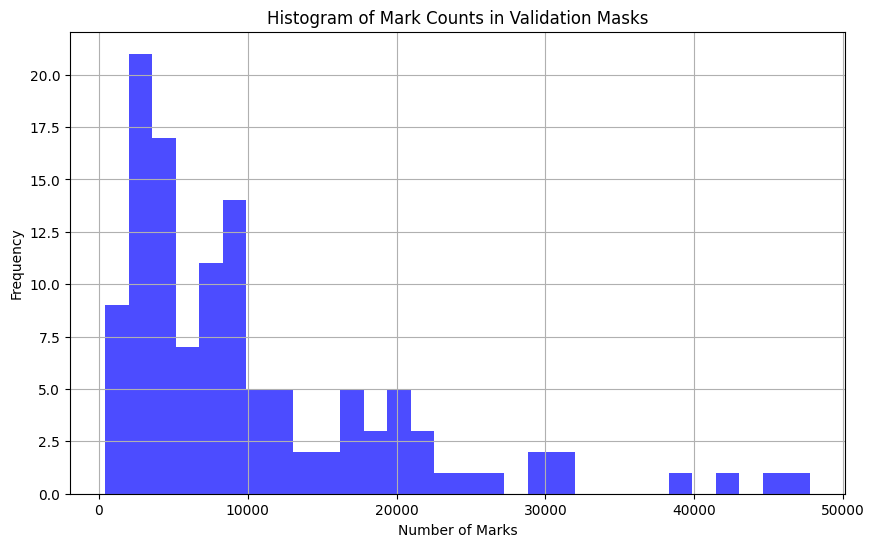

In [2]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from data import read_mask

# Function to count the number of marked pixels in a mask
def count_marks(mask):
    return np.sum(mask > 0)

# Load and analyze masks from valid_y
mark_counts = []
for mask_path in valid_y:
    mask = read_mask(mask_path.encode('utf-8'))
    num_marks = count_marks(mask)
    mark_counts.append(num_marks)

# Display statistics about marks
print("Statistics of marks in validation masks:")
print("Total number of masks:", len(mark_counts))
print("Average number of marks per mask:", np.mean(mark_counts))
print("Minimum number of marks in a mask:", np.min(mark_counts))
print("Maximum number of marks in a mask:", np.max(mark_counts))

# Optionally, plot a histogram of mark counts
plt.figure(figsize=(10, 6))
plt.hist(mark_counts, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Mark Counts in Validation Masks')
plt.xlabel('Number of Marks')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

../../Dataset/Kvasir-SEG/masks\cju0s690hkp960855tjuaqvv0.jpg
Analysis of Floating-point Mask 1:
Number of Unique Values: 82
Unique Values: [0.         0.00392157 0.00784314 0.01176471 0.01960784 0.04705882
 0.05098039 0.05882353 0.0627451  0.06666667 0.08235294 0.09411765
 0.09803922 0.10196079 0.10980392 0.11372549 0.11764706 0.12156863
 0.12941177 0.13725491 0.14117648 0.14509805 0.1882353  0.19215687
 0.20784314 0.21568628 0.23137255 0.23529412 0.23921569 0.24313726
 0.26666668 0.27450982 0.2901961  0.29411766 0.30980393 0.3137255
 0.31764707 0.33333334 0.3647059  0.36862746 0.38039216 0.44313726
 0.4509804  0.47843137 0.5019608  0.50980395 0.5294118  0.54901963
 0.5529412  0.5647059  0.5686275  0.58431375 0.5882353  0.6392157
 0.64705884 0.6627451  0.7019608  0.7058824  0.70980394 0.7137255
 0.7176471  0.7529412  0.79607844 0.80784315 0.8392157  0.8901961
 0.8980392  0.9019608  0.90588236 0.9254902  0.9411765  0.94509804
 0.9490196  0.9529412  0.95686275 0.9764706  0.98039216 0.984

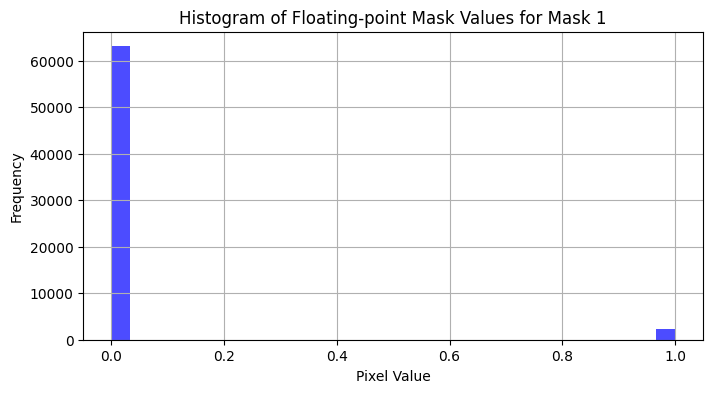

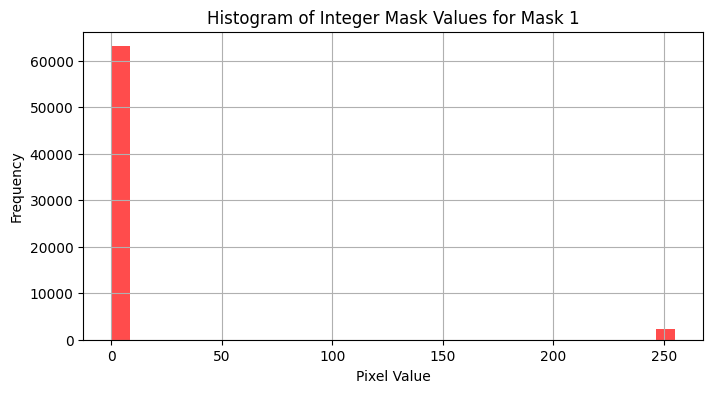

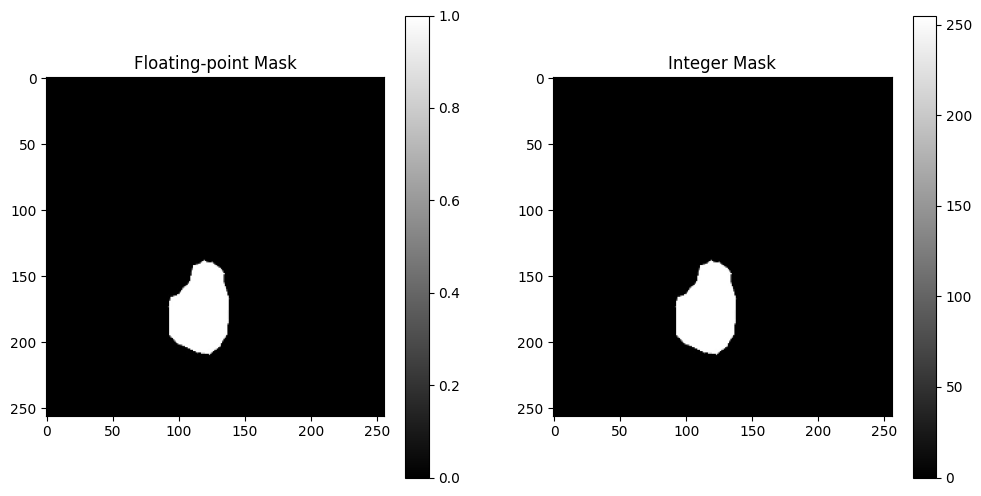

In [6]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from data import read_mask2, load_data  # Make sure to import read_mask2

# Load datasets
path = "../../Dataset/Kvasir-SEG/"  # Adjust the path to your dataset
(_, _), (_, valid_y) = load_data(path)

# Sort valid_y by filenames
valid_y_sorted = sorted(valid_y, key=lambda x: x.split('/')[-1])

# Analyze the first three masks from valid_y
for i, mask_path in enumerate(valid_y_sorted[:1]):
    print(mask_path)
    # Use read_mask2 to get both floating and integer masks
    mask_float, mask_int = read_mask2(mask_path.encode('utf-8'))  # Encoding the path since read_mask2 expects a bytes-like object
    
    # Analysis for floating-point mask
    unique_values_float = np.unique(mask_float)
    num_unique_values_float = len(unique_values_float)
    min_value_float = np.min(mask_float)
    max_value_float = np.max(mask_float)
    
    # Analysis for integer mask
    unique_values_int = np.unique(mask_int)
    num_unique_values_int = len(unique_values_int)
    min_value_int = np.min(mask_int)
    max_value_int = np.max(mask_int)
    
    # Display the analysis results for each mask
    print(f"Analysis of Floating-point Mask {i+1}:")
    print(f"Number of Unique Values: {num_unique_values_float}")
    print(f"Unique Values: {unique_values_float}")
    print(f"Minimum Value: {min_value_float}")
    print(f"Maximum Value: {max_value_float}")
    
    print(f"Analysis of Integer Mask {i+1}:")
    print(f"Number of Unique Values: {num_unique_values_int}")
    print(f"Unique Values: {unique_values_int}")
    print(f"Minimum Value: {min_value_int}")
    print(f"Maximum Value: {max_value_int}")

    # Plot histogram of the floating-point mask values
    plt.figure(figsize=(8, 4))
    plt.hist(mask_float.ravel(), bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of Floating-point Mask Values for Mask {i+1}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Plot histogram of the integer mask values
    plt.figure(figsize=(8, 4))
    plt.hist(mask_int.ravel(), bins=30, color='red', alpha=0.7)
    plt.title(f'Histogram of Integer Mask Values for Mask {i+1}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    print("\n")
    import matplotlib.pyplot as plt

    # Assuming mask_float and mask_int are already loaded as shown in your output
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(mask_float[:, :, 0], cmap='gray')
    plt.title('Floating-point Mask')
    plt.colorbar()
    
    plt.subplot(1, 2, 2)
    plt.imshow(mask_int, cmap='gray')
    plt.title('Integer Mask')
    plt.colorbar()
    
    plt.show()

# Plot histogram for floating-point mask values with more bins and log scale
plt.figure(figsize=(10, 5))
plt.hist(mask_float.ravel(), bins=100, color='blue', alpha=0.7, log=True)
plt.title('Histogram of Floating-point Mask Values (Log Scale)')
plt.xlabel('Pixel Value')
plt.ylabel('Log Frequency')
plt.grid(True)
plt.show()

# Plot histogram for integer mask values with more bins and log scale
plt.figure(figsize=(10, 5))
plt.hist(mask_int.ravel(), bins=100, color='red', alpha=0.7, log=True)
plt.title('Histogram of Integer Mask Values (Log Scale)')
plt.xlabel('Pixel Value')
plt.ylabel('Log Frequency')
plt.grid(True)
plt.show()